# 8장 안전 운전자 예측 경진대회 환경 세팅된 노트북 양식

## Data Preprocessing

In [1]:
import pandas as pd

data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'
train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [2]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
train.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [5]:
for i in train.columns:
    train.loc[train[i] == -1, i] = None
for i in test.columns:
    test.loc[test[i] == -1, i] = None

train['NaN_cnt'] = train.isnull().sum(1)
test['NaN_cnt'] = test.isnull().sum(1)

train = train.fillna(-1)
test = test.fillna(-1)

In [6]:
test.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'NaN_cnt'],
     

In [7]:
total = pd.concat([train, test], ignore_index=True)
X_total = total.drop('target', axis = 1)

In [8]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [i for i in X_total.columns if 'cat' in i]
onehot_encoder = OneHotEncoder()
encoded_cat = onehot_encoder.fit_transform(X_total[cat_features])
encoded_cat

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [9]:
non_cat_features = [i for i in X_total.columns if 'cat' not in i]
non_cat_total = X_total[non_cat_features]

from scipy import sparse
X_total = sparse.hstack([sparse.csr_matrix(non_cat_total),
                         encoded_cat],
                       format='csr')
X_total

<1488028x228 sparse matrix of type '<class 'numpy.float64'>'
	with 63048985 stored elements in Compressed Sparse Row format>

In [10]:
X = X_total[:len(train)]
X_test = X_total[len(train):]
y = train['target'].values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


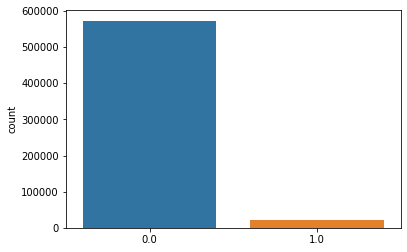

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y)
plt.show()
# 불균형이 엄청 심함.

## Modeling: 

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split # 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, random_state=0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [13]:
def eval_gini(y_true, y_prob):
    
    y_true = np.asarray(y_true) # numba가 이해할 수 있는 형식으로 변환
    y_true = y_true[np.argsort(y_prob)]
    ntrue= 0
    gini =0 
    delta = 0
    n=len(y_true)
    for i in range(n-1,-1,-1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1-y_i
    gini = 1-2*gini/(ntrue*(n-ntrue))
    return gini

def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수''' # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'num_leaves': int(round(num_leaves)),
                'lambda_l1': lambda_l1,
                'lambda_l2': lambda_l2,
                'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    params.update(fixed_params)
    print('하이퍼파라미터:', params)
    lgb_model = lgb.train(params=params,
                          train_set=bayes_dtrain,
                          num_boost_round=2500,
                          valid_sets=bayes_dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=False)
    preds = lgb_model.predict(X_valid)
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    return gini_score

In [14]:
param_bounds = {'num_leaves': (30, 40), 
                'lambda_l1': (0.7, 0.9), 
                'lambda_l2': (0.9, 1), 
                'feature_fraction': (0.6, 0.7), 
                'bagging_fraction': (0.6, 0.9), 
                'min_child_samples': (6, 10), 
                'min_child_weight': (10, 40)}
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005, 
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

In [16]:
from bayes_opt import BayesianOptimization
import numpy as np

def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 228
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2814762175324472

|  1        |  0.2815   |  0.7646   |  

In [17]:
max_params = optimizer.max['params']
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
max_params.update(fixed_params)

In [18]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    lgb_model = lgb.train(params=max_params,
                          train_set=dtrain,
                          num_boost_round=2500,
                          valid_sets=dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=100)
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 227
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154288	valid_0's gini: 0.268455
[200]	valid_0's binary_logloss: 0.15325	valid_0's gini: 0.271757
[300]	valid_0's binary_logloss: 0.152678	valid_0's gini: 0.276202
[400]	valid_0's binary_logloss: 0.152332	valid_0's gini: 0.28017
[500]	valid_0's binary_logloss: 0.15209	valid_0's gini: 0.283785
[600]	valid_0's binary_logloss: 0.151931	valid_0's gini: 0.28619
[700]	valid_0's binary_logloss: 0.151817	valid_0's gini: 0.288307
[800]	valid_0's binary_logloss: 0.151741	valid_0's 

In [19]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.2860508352674289


In [20]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')